In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder , StandardScaler 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression , Lasso , Ridge 


In [12]:
data1 = pd.read_csv(r"C:\Users\MYPC\Downloads\calories.csv")

In [16]:
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [20]:
data2 = pd.read_csv(r"C:\Users\MYPC\Downloads\exercise.csv")

In [22]:
data2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [26]:
data=pd.merge(data2 , data1 , on="User_ID" , how="inner")

In [28]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [30]:
data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [32]:
data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12527,10442926,male,79,194.0,103.0,21.0,96.0,40.9,154.0
10337,10391526,female,58,164.0,59.0,27.0,99.0,40.8,160.0
8926,18339409,female,53,163.0,67.0,29.0,109.0,40.9,197.0
13514,13661112,female,22,173.0,64.0,15.0,94.0,40.5,70.0
3752,17070353,male,62,166.0,77.0,5.0,82.0,38.8,19.0


In [34]:
print("The number of rows: " , data.shape[0] , " The number of columns: " , data.shape[1])

The number of rows:  15000  The number of columns:  9


In [36]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [40]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [42]:
data.duplicated().sum()

0

In [44]:
data.T.duplicated().sum()

0

In [49]:
data.drop("User_ID" , axis=1 ,inplace = True)

In [51]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


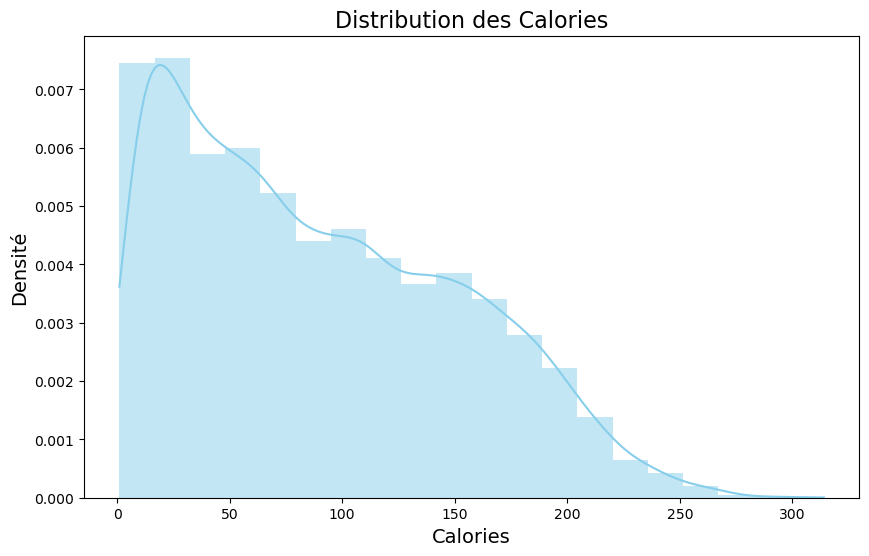

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Calories'], kde=True, bins=20, color='skyblue', stat="density", linewidth=0)
plt.title('Distribution des Calories', fontsize=16)
plt.xlabel('Calories', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.show()

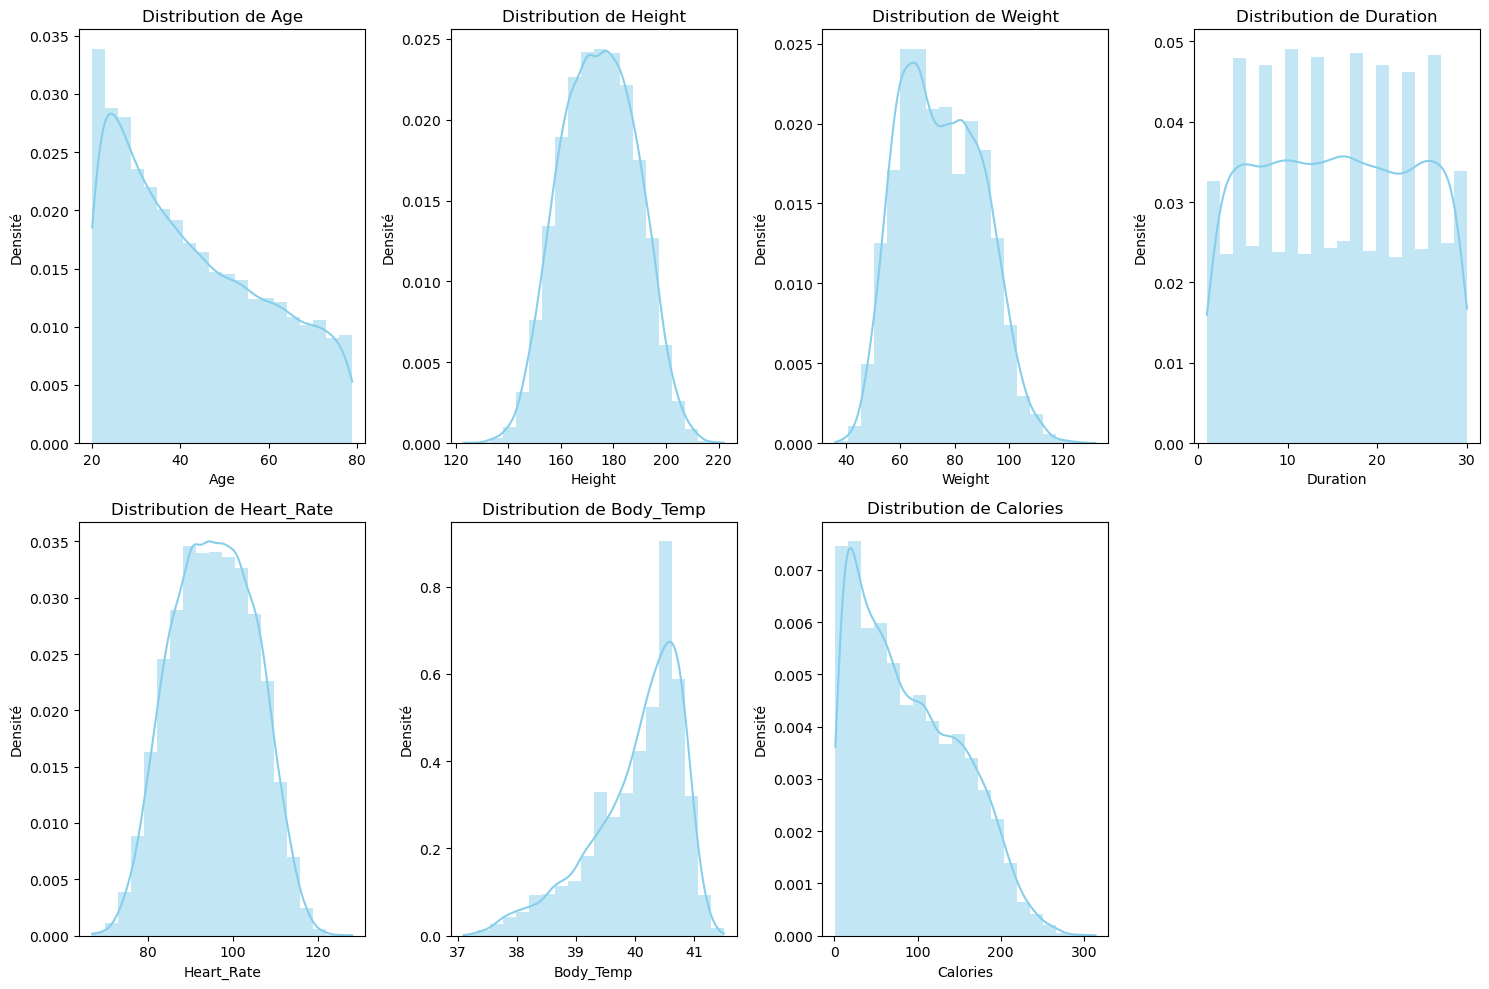

In [57]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns)//2 + 1, i)  # 2 lignes, autant de colonnes que nécessaire
    sns.histplot(data[col], kde=True, bins=20, color='skyblue', stat="density", linewidth=0)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Densité')

plt.tight_layout()
plt.show()

C:\Users\MYPC\AppData\Local\Temp\ipykernel_10856\2363918847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


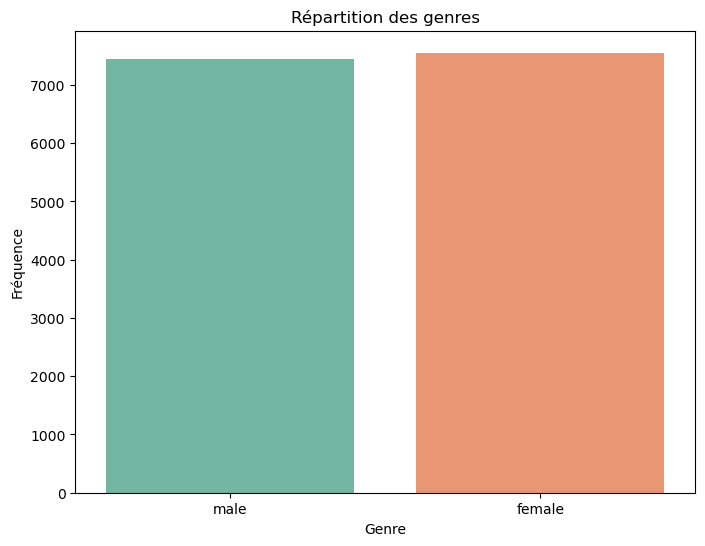

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Répartition des genres')
plt.xlabel('Genre')
plt.ylabel('Fréquence')
plt.show()

In [64]:
data.replace({"male":"1" , "female":"0"},inplace = True)

In [66]:
data.sample()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
8616,0,20,180.0,74.0,13.0,94.0,40.1,59.0


In [68]:
correlation=data.corr()

<Axes: >

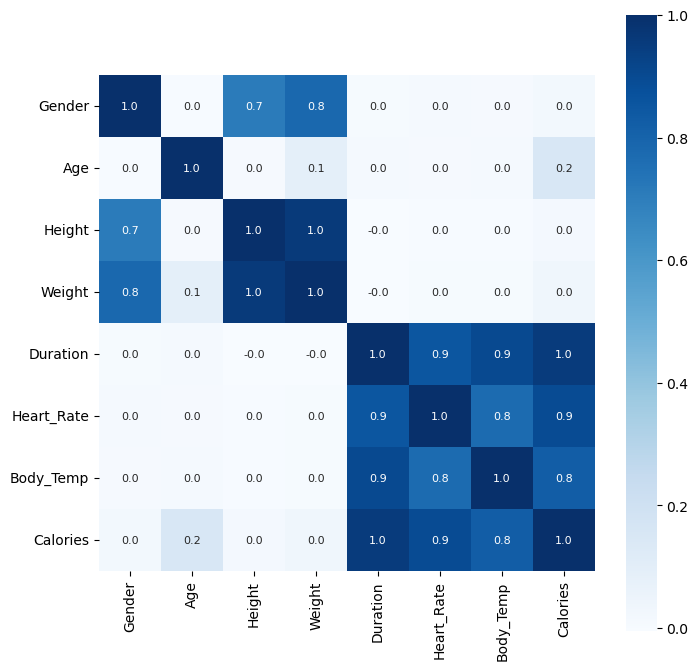

In [70]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [72]:
data.drop(["Height","Duration"],axis=1 , inplace=True) 

In [74]:
print("The number of rows: " , data.shape[0] ," The number of columns: ",data.shape[1])

The number of rows:  15000  The number of columns:  6


In [87]:
data.columns

Index(['Gender', 'Age', 'Weight', 'Heart_Rate', 'Body_Temp', 'Calories'], dtype='object')

In [89]:
scaler = StandardScaler()
data[["Age","Weight","Heart_Rate","Body_Temp"]] = scaler.fit_transform(data[["Age","Weight","Heart_Rate","Body_Temp"]])

In [91]:
data.head()

,Gender,Age,Weight,Heart_Rate,Body_Temp,Calories
0,1,1.484726,1.265909,0.989404,0.994023,231.0
1,0,-1.342179,-0.995458,-0.158461,0.352342,66.0
2,1,1.543620,0.268247,-0.784569,-1.701035,26.0
3,0,-0.517665,-0.263839,0.467647,0.609015,71.0
4,0,-0.929922,-1.128480,-1.515029,-0.289338,35.0


In [119]:
X = data.drop("Calories" , axis=1)
y = data["Calories"]
X['Gender'] = pd.to_numeric(X['Gender'], errors='coerce')


In [121]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 ,random_state=4 , shuffle =True)

In [123]:
from sklearn.metrics import mean_absolute_error as mae , r2_score
models = [LinearRegression(),XGBRegressor(),Lasso(),RandomForestRegressor(),Ridge()]
for model in models:
    model.fit(X_train,y_train)
    train_preds = model.predict(X_train)
    test_preds=model.predict(X_test)
    train_mae = mae(y_train,train_preds)
    test_mae=mae(y_test, test_preds)
    train_r2=r2_score(y_train,train_preds)
    test_r2 = r2_score(y_test,test_preds)
     
    print(f'------ Résultats pour {model} ------')
    print(f'Training Error (MAE): {train_mae:.4f}')
    print(f'Validation Error (MAE): {test_mae:.4f}')
    print(f'Training Accuracy (R²): {train_r2:.4f}')
    print(f'Validation Accuracy (R²): {test_r2:.4f}')
    print('-' * 50)

------ Résultats pour LinearRegression() ------
Training Error (MAE): 17.9046
Validation Error (MAE): 17.9217
Training Accuracy (R²): 0.8696
Validation Accuracy (R²): 0.8717
--------------------------------------------------
------ Résultats pour XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) ------

In [125]:
#comme prévu xgboostregressor a les meilleurs statistiques puisque il est très performant